In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"C:\Users\SIDDHARTH\OneDrive\Documents\JOB PROFILES\Data Analyst\Machine Learning\salaries.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


<Axes: xlabel='salary_more_then_100k', ylabel='degree'>

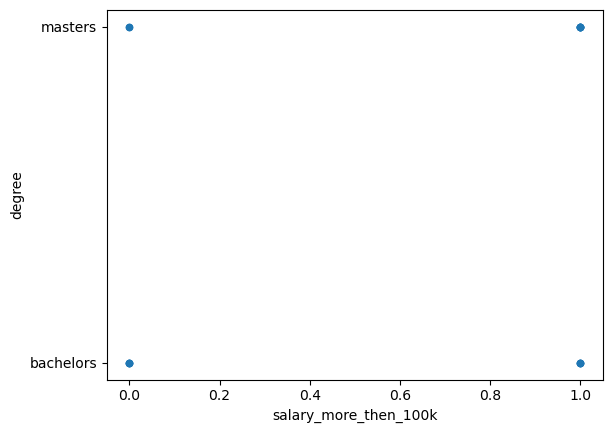

In [12]:
df.plot.scatter(x = 'salary_more_then_100k', y = 'degree')

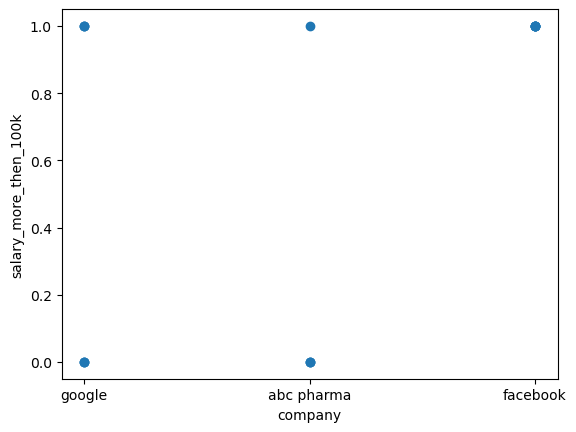

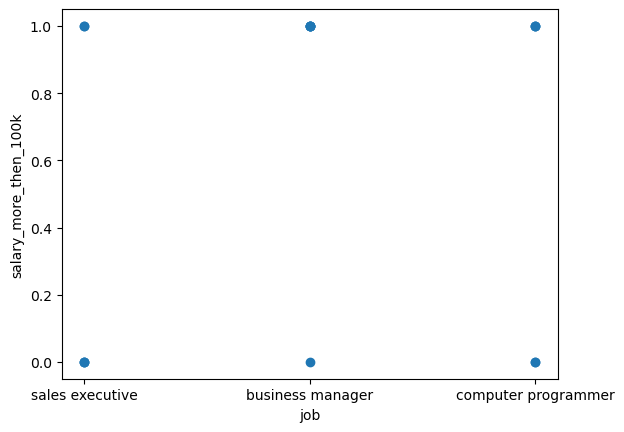

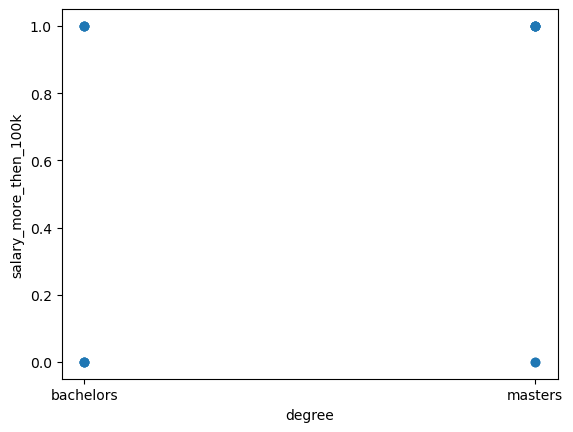

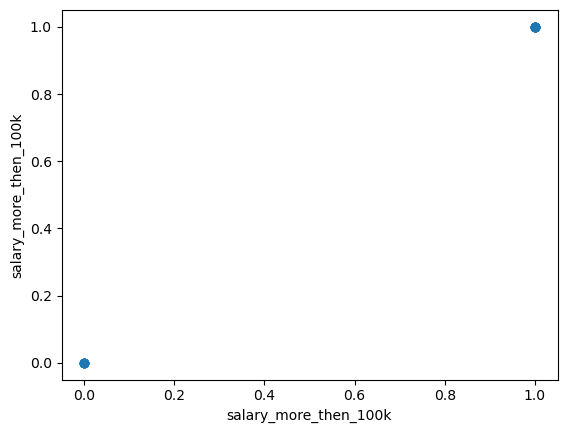

In [29]:
for col in df.columns:
    plt.figure()
    plt.scatter(df[col], df['salary_more_then_100k'])
    plt.xlabel(col)
    plt.ylabel('salary_more_then_100k')

In [30]:
## first class will be company as we can see but well 
## ofc we ain't gonna use this slow mo appraoch 

In [31]:
inputs = df.drop(columns= 'salary_more_then_100k')
target = df['salary_more_then_100k']

In [32]:
from sklearn.preprocessing import LabelEncoder

In [34]:
## recall the use case of one hot encoding in multi class linear regression 
## regression can only play over numerical nunber, right.

In [35]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [37]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_company.fit_transform(inputs['job'])
inputs['degree_n'] = le_company.fit_transform(inputs['degree'])

In [40]:
inputs.drop(columns= ['company', 'job', 'degree'], inplace= True)


KeyError: "['company', 'job', 'degree'] not found in axis"

In [41]:
inputs

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [43]:
from sklearn import tree

In [53]:
model = tree.DecisionTreeClassifier()

In [45]:
from sklearn.model_selection import train_test_split

In [54]:
inputs_train, inputs_test, target_train, target_test = train_test_split(inputs, target, test_size= 0.1)

In [55]:
model.fit(inputs_train, target_train)

DecisionTreeClassifier()

In [56]:
model.predict(inputs_test)

array([1, 1], dtype=int64)

In [57]:
model.score(inputs_test, target_test)

0.5

In [60]:
model.predict([[1,2,1]])

c:\Users\SIDDHARTH\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [62]:
df2 = pd.read_csv(r"C:\Users\SIDDHARTH\OneDrive\Documents\JOB PROFILES\Data Analyst\Machine Learning\titanic.csv")
df2


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [64]:
df2.drop(columns= ['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], inplace= True)

In [65]:
df2

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [66]:
x = df2['Survived']
y = df2.drop(columns= 'Survived')

In [70]:
y.columns.to_numpy()

array(['Pclass', 'Sex', 'Age', 'Fare'], dtype=object)

In [71]:
columnns_in_use = ['Pclass', 'Sex', 'Age', 'Fare']

In [73]:
for col in columnns_in_use :
    le = LabelEncoder()
    y[col] = le.fit_transform(y[col])

In [74]:
y

,Pclass,Sex,Age,Fare
0,2,1,28,18
1,0,0,51,207
2,2,0,34,41
3,0,0,47,189
4,2,1,47,43
...,...,...,...,...
886,1,1,35,85
887,0,0,24,153
888,2,0,88,131
889,0,1,34,153


In [75]:
model2 = tree.DecisionTreeClassifier()

In [82]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

In [93]:
model2.fit(y_train, x_train)

DecisionTreeClassifier()

In [94]:
model2.score(y_test,x_test)

0.7821229050279329

,Pclass,Sex,Age,Fare
0,2,1,28,18
1,0,0,51,207
2,2,0,34,41
3,0,0,47,189
4,2,1,47,43
...,...,...,...,...
886,1,1,35,85
887,0,0,24,153
888,2,0,88,131
889,0,1,34,153
